In [1]:
import pandas as pd

# Read CSV file
df = pd.read_csv('dubai_properties.csv')

# Information about the dataset
# df.head()
# df.info()
# df.describe() # For numerical columns
# df.columns # Column names
# df.shape # Number of rows and columns
# df.isnull().sum() # Checking for missing values
# df.dtypes # Data types of columns
# df['Furnishing'].value_counts() # Checking the possible values of the target variable
# df['Type'].value_counts() # Checking the possible values of the feature Type
# df['Rent_category'].value_counts() # Checking the possible values of the feature Rent_category

In [2]:
# Sampling 5000 entries witout replacement
sampled_df = df.sample(n=5000, replace=False)

In [3]:
# Developing a model using the Naive Bayes classifier
# Target variable:
#   Furnishing
# Features:
#   Rent (numerical, continuous)
#   Beds (numerical, discrete)
#   Baths (numerical, discrete)
#   Type (categorical, nominal)
#   Area_in_sqft (numerical, continuous)
#   Rent_category (categorical, ordinal)
#   Age_of_listing_in_days (numerical, discrete)

In [4]:
# Data Preprocessing

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# OneHotEncoder for nominal features
sampled_df_encoded = pd.get_dummies(sampled_df, columns=['Type'], drop_first=True)

# OrdinalEncoder for ordinal features
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
sampled_df_encoded['Rent_category'] = ordinal_encoder.fit_transform(sampled_df_encoded[['Rent_category']])

# LabelEncoder for target variable
label_encoder = LabelEncoder()
sampled_df_encoded['Furnishing'] = label_encoder.fit_transform(sampled_df_encoded['Furnishing'])

# sampled_df_encoded.head()

In [5]:
# Splitting features and target variable

x = sampled_df_encoded[['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_category', 'Age_of_listing_in_days'] + [col for col in sampled_df_encoded.columns if 'Type_' in col]]
y = sampled_df_encoded['Furnishing']

In [6]:
# Splitting sampled data into 70% training, 30% testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
# Training a Gaussian Naive Bayes model

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [8]:
# Applying model to testing data

y_pred = model.predict(x_test)

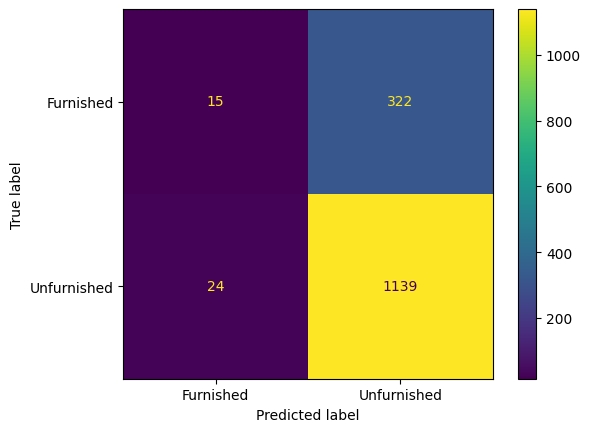

In [9]:
# Constructing the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

class_names = label_encoder.inverse_transform([0, 1])
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
conf_matrix_display.plot()

# print("Confusion Matrix:")
# print(conf_matrix)

In [10]:
# Calculating the misclassification rate

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

print("Accuracy:", accuracy)
print("Misclassification Rate:", misclassification_rate)

Accuracy: 0.7693333333333333
Misclassification Rate: 0.2306666666666667


In [11]:
# Does the data suffer from imbalanced classification of the target variable? If so, how does this imbalance affect the accuracy of your model?

# Furnished encoded as 0
# Unfurnished encoded as 1
y_train.value_counts()

# We can observe that in the training data, the target variable is imbalanced.
# There is a much larger number of Unfurnished entries compared to Furnished entries.
# Because the Unfurnished class is much more frequent, this imbalance affects the model's performance in terms of how it predicts the minority class (Furnished).
# Furthermore, the confusion matrix shows that there is a large number of incorrect predictions where the minority class (Furnished) was classified as Unfurnished.

,count
Furnishing,
1,2751
0,749


In [14]:
# Getting the classification report

from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

# The accuracy is in the mid 70%, however, this is misleading because the dataset is imbalanced.

# Based on the precision for the Furnished class, only around 35% of the predictions for Furnished were correct.
# Based on the recall for the Furnished class, less than 5% of the actual Furnished entries were identified by the model.
# We can see that the model is struggling significantly with the minority class.
# It classifies most Furnished entries as Unfurnished.

# Based on the precision for the Unfurnished class, around 75% of the predictions for Unfurnished were correct.
# Based on the recall for the Unfurnished class, the model correctly identified around 95% of the Unfurnished entries.
# We can see that the model is heavily biased towards predicting the majority class.
# It achieves good performance for the majority class, but it comes at the expense of the minority class.

# The F1 scores indicate poor performance for the Furnished class and a high bias towards the Unfurnished class.

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.04      0.08       337
           1       0.78      0.98      0.87      1163

    accuracy                           0.77      1500
   macro avg       0.58      0.51      0.47      1500
weighted avg       0.69      0.77      0.69      1500

